In [3]:
import pandas as pd
import numpy as np

In [4]:
import statsmodels.api as sm


In [5]:
df = pd.read_csv("Census2011.csv")
df = df.iloc[1: , :]
df.dtypes
df

,LSOA,Pincode,Year,All households,No adults in employment - with dependent children,No adults in employment - without dependent children,With dependent children - all ages,With dependent children - aged 0 to 4,All usual residents,Age 0 to 4,...,All categories: Tenure,Owned outright,Owned with a mortgage or loan,Shared ownership,Rented from council(local authority),Rented from a housing association/registered social landlord,Rented from a private landlord or letting agency,Median Household Price,Is gentrifiable?,Gentrified
1,Bolton 005A,E01004766,2011.0,795.0,25.0,295.0,188.0,78.0,1592.0,93.0,...,795.0,243.0,247.0,4.0,70.0,42.0,146.0,"98,000",Gentrifiable,1.0
2,Bolton 005B,E01004767,2011.0,768.0,16.0,239.0,181.0,85.0,1678.0,106.0,...,768.0,249.0,257.0,4.0,26.0,31.0,184.0,"73,000",Gentrifiable,1.0
3,Bolton 001A,E01004768,2011.0,605.0,4.0,149.0,218.0,73.0,1601.0,86.0,...,605.0,241.0,328.0,0.0,3.0,2.0,24.0,"1,63,500",Ungentrifiable,0.0
4,Bolton 003A,E01004769,2011.0,685.0,1.0,204.0,183.0,67.0,1534.0,88.0,...,685.0,283.0,335.0,4.0,1.0,1.0,47.0,"1,42,250",Ungentrifiable,0.0
5,Bolton 003B,E01004770,2011.0,616.0,7.0,237.0,164.0,64.0,1465.0,75.0,...,616.0,333.0,229.0,3.0,6.0,0.0,35.0,"1,27,750",Ungentrifiable,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,Manchester 013F,E01033684,2011.0,649.0,4.0,53.0,22.0,17.0,1203.0,17.0,...,649.0,11.0,53.0,2.0,1.0,11.0,564.0,"1,29,000",Ungentrifiable,0.0
1670,Manchester 003F,E01033685,2011.0,652.0,34.0,147.0,246.0,123.0,1561.0,157.0,...,652.0,84.0,267.0,4.0,93.0,26.0,155.0,"1,12,500",Ungentrifiable,0.0
1671,Manchester 028F,E01033686,2011.0,608.0,18.0,144.0,120.0,68.0,1265.0,86.0,...,608.0,78.0,133.0,3.0,10.0,174.0,199.0,"1,62,500",Ungentrifiable,0.0
1672,Manchester 003G,E01033687,2011.0,802.0,35.0,360.0,159.0,69.0,1417.0,75.0,...,802.0,71.0,135.0,3.0,373.0,86.0,106.0,:,Ungentrifiable,0.0


In [14]:
df_column = df.columns.tolist()
remove_items = (['LSOA','Pincode','Year','Median Household Price','Is gentrifiable?', 'Gentrified',
                 'Mean Age', 'Median Age',
                 'Large employers and higher managerial and administrative occupations',
                  'Higher professional occupations',
                  'Lower managerial, administrative and professional occupations',
                  'Intermediate occupations',
                  'Small employers and own account workers',
                  'Lower supervisory and technical occupations',
                  'Semi-routine occupations',
                  'Routine occupations',
                  'Never worked',
                  'Long-term unemployed.1',
                  'Full-time students',
                  'Not classifiable for other reasons',
                 'Medical and care establishments - NHS - Psychiatric hospital / home',
                  "Medical and care establishments - Local Authority - Children's home",
                  'Medical and care establishments - Local Authority - Other',
                  'Medical and care establishments - Housing association',
                  'Medical and care establishments - Other - Nursing home',
                  'Medical and care establishments - Other - Residential care home',
                  "Medical and care establishments - Other - Children's home",
                  'Medical and care establishments - Other',
                 'No adults in employment - with dependent children',
                  'No adults in employment - without dependent children',
                 'Unemployed: Age 16 to 24',
                  'Unemployed: Age 50 to 74',
                  'Unemployed: Never worked',
                  'Long-term unemployed',
                  'Schoolchildren and full-time students: Age 16 to 17',
                  'Schoolchildren and full-time students: Age 18 to 74',
                  'Full-time students: Age 18 to 74: Economically active: In employment',
                  'Full-time students: Age 18 to 74: Economically active: Unemployed',
                  'Full-time students: Age 18 to 74: Economically inactive',
                 'With dependent children - all ages',
              'With dependent children - aged 0 to 4',
              'No cars or vans in household',
 '1 car or van in household',
 '2 cars or vans in household',
 '3 cars or vans in household',
 '4 or more cars or vans in household',
 'sum of all cars or vans in the area',
 'Number of residents by communal establishment type',
 'Other establishments',

'Economically active',
    'Economically active: Employee: Part-time',
 'Economically active: Employee: Full-time',
 'Economically active: Self-employed',
 'Economically inactive: Retired',
 'Economically inactive: Student (including full-time students)',
 'Economically inactive: Looking after home or family',
 'Economically inactive: Long-term sick or disabled',
 'Economically inactive: Other',
                 'White: British',
 'White: Irish',
                 'Mixed: White and Black Caribbean',
 'Mixed: White and Black African',
 'Mixed: White and Asian',
                 'Asian/Asian British: Indian',
 'Asian/Asian British: Pakistani',
 'Asian/Asian British: Bangladeshi',

 'Black/Black British: Black Caribbean',
 'Black/Black British: Black African',
 'Black/Black British: Other',
                 'Males',

 'Females',
 'People living in households',
 'People living in communal establishments',
 'Students away from home',
 'Area (hectares)'])

list_x = [item for item in df_column if item not in remove_items]

list_x = [item for item in list_x if not item.startswith('Age')]
list_x = [item for item in list_x if not item.startswith('All')]
list_x

['Economically active: In employment',
 'Economically active: Unemployed',
 'Economically active: Full-time student',
 'Economically Inactive',
 'White',
 'Mixed',
 'Mixed: Other',
 'Asian/Asian British',
 'Black/Black British',
 'C Mining and quarrying',
 'D Manufacturing',
 'F Constructiion',
 'G Wholesale and retail trade, repair of motor vehicles',
 'H Hotels and restaurants',
 'J Financial Intermediation',
 'L Public administration and defence, social security',
 'M Education',
 'N Health and social work',
 '1. Managers and senior officials',
 '2. Professional occupations',
 '3. Associate professional and technical occupations',
 '4. Administrative and secretarial occupations',
 '5. Skilled trades occupations',
 '6. Personal service occupations',
 '7. Sales and customer service occupations',
 '8. Process, plant and machine operatives',
 '9. Elementary occupations',
 'No qualifications',
 'Highest level of qualification: Level 1 qualifications',
 'Highest level of qualification: Le

In [15]:
df1 = sm.add_constant(df)

# Fit the linear regression model
model = sm.OLS(df1['Gentrified'], df1[list_x])
results = model.fit()

# Print the summary with p-values
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Gentrified   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.726
Method:                 Least Squares   F-statistic:                              111.6
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                        0.00
Time:                        06:54:46   Log-Likelihood:                         -707.43
No. Observations:                1673   AIC:                                      1495.
Df Residuals:                    1633   BIC:                                      1712.
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
                                                                       coef    std err          t      P>|t|      [0.025

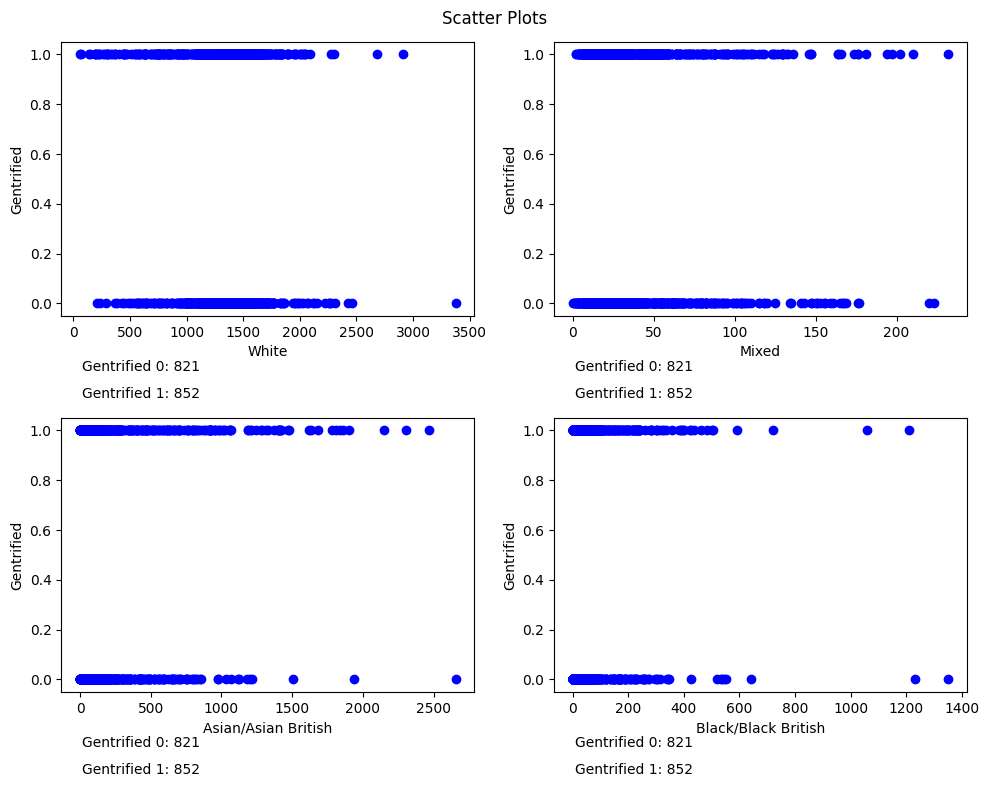

In [16]:
import matplotlib.pyplot as plt

df= df.copy()
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array
axes = axes.flatten()

# Iterate over variables and create scatter plots
variables = ['White', 'Mixed', 'Asian/Asian British', 'Black/Black British']

for i, variable in enumerate(variables):
    scatter = axes[i].scatter(df[variable], df['Gentrified'], c='blue')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Gentrified')

    # Calculate the count of Gentrified 0 and Gentrified 1
    gentrified_0_count = df[df['Gentrified'] == 0][variable].count()
    gentrified_1_count = df[df['Gentrified'] == 1][variable].count()

    # Display the count of Gentrified 0 and Gentrified 1
    axes[i].text(0.05, -0.2, f'Gentrified 0: {gentrified_0_count}', transform=axes[i].transAxes)
    axes[i].text(0.05, -0.3, f'Gentrified 1: {gentrified_1_count}', transform=axes[i].transAxes)

# Set the overall title
fig.suptitle('Scatter Plots')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()

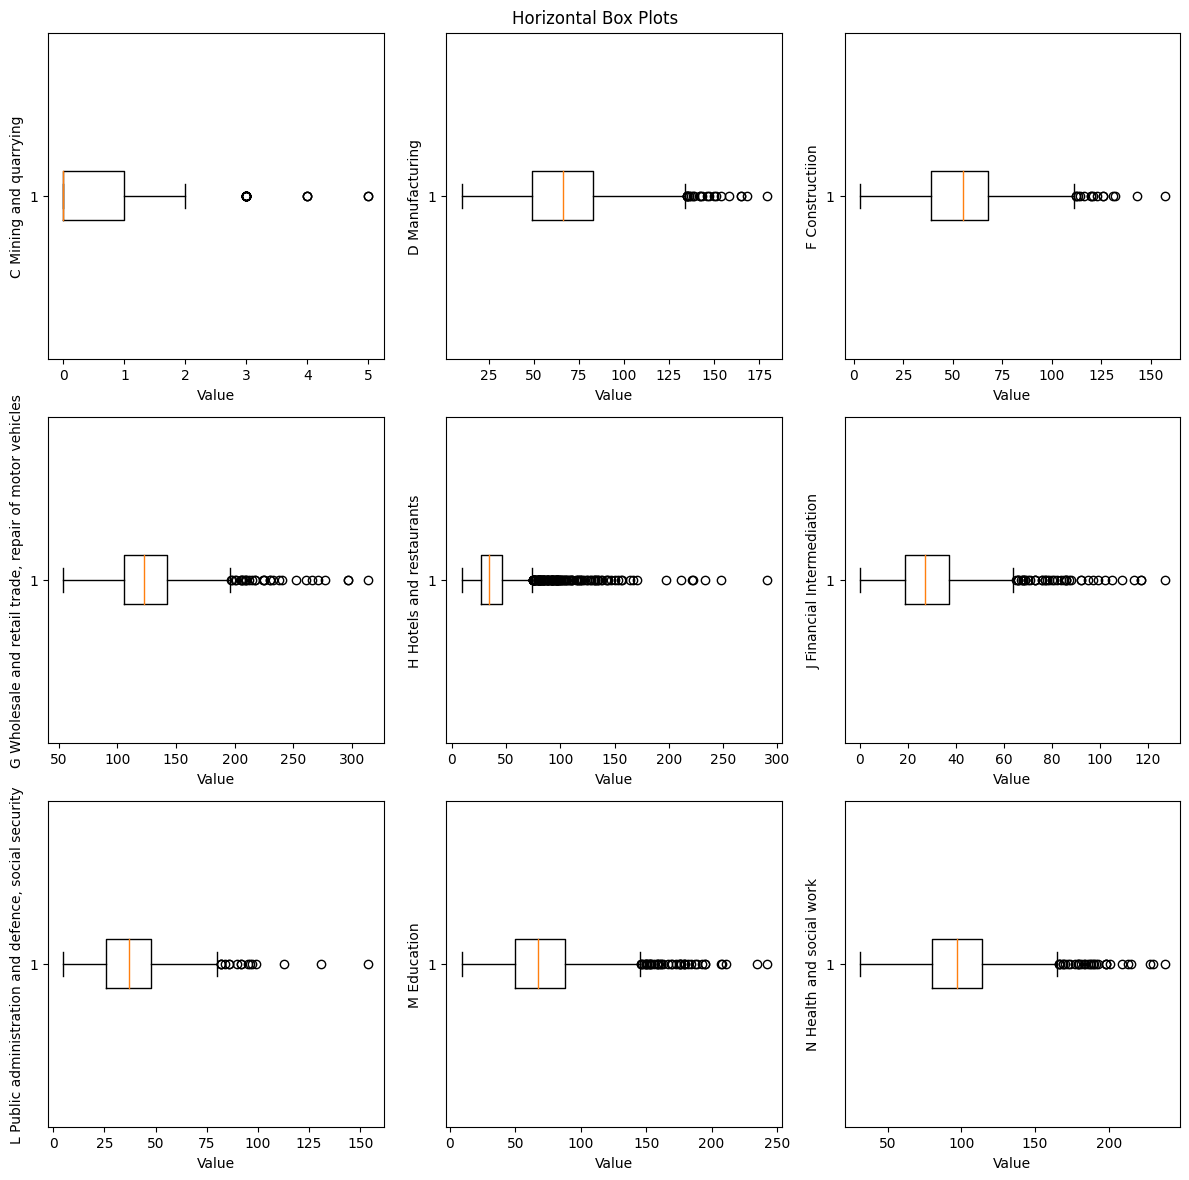

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Iterate over variables and create box plots
variables = ['C Mining and quarrying', 'D Manufacturing', 'F Constructiion', 'G Wholesale and retail trade, repair of motor vehicles',
             'H Hotels and restaurants', 'J Financial Intermediation', 'L Public administration and defence, social security',
             'M Education', 'N Health and social work']

for i, variable in enumerate(variables):
    axes[i].boxplot(df[variable], vert=False)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel(variable)

# Remove empty subplots
if len(variables) < 9:
    for j in range(len(variables), 9):
        fig.delaxes(axes[j])

# Set the overall title
fig.suptitle('Horizontal Box Plots')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()

In [10]:
df_occu = pd.read_csv("Census2011_cleaned_Occupation.csv")

df_occu.dtypes

df_occu= df_occu[['LSOA',
 'Pincode',
 'Gentrified',
 'C Mining and quarrying_Avg',
 'D Manufacturing_Avg',
 'F Constructiion_Avg',
 'G Wholesale and retail trade, repair of motor vehicles_Avg',
 'H Hotels and restaurants_Avg',
 'J Financial Intermediation_Avg',
 'L Public administration and defence, social security_Avg',
 'M Education_Avg',
 'N Health and social work_Avg']]
df_occu_column = df_occu.columns.tolist()
df_occu_column

['LSOA',
 'Pincode',
 'Gentrified',
 'C Mining and quarrying_Avg',
 'D Manufacturing_Avg',
 'F Constructiion_Avg',
 'G Wholesale and retail trade, repair of motor vehicles_Avg',
 'H Hotels and restaurants_Avg',
 'J Financial Intermediation_Avg',
 'L Public administration and defence, social security_Avg',
 'M Education_Avg',
 'N Health and social work_Avg']

<ipython-input-11-eb5eae3a20ef>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[row, col], data=df_occu, x=
<ipython-input-11-eb5eae3a20ef>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[row, col], data=df_occu, x=
<ipython-input-11-eb5eae3a20ef>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[row, col], data=df_occu, x=
<ipython-input-11-eb5eae3a20ef>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `l

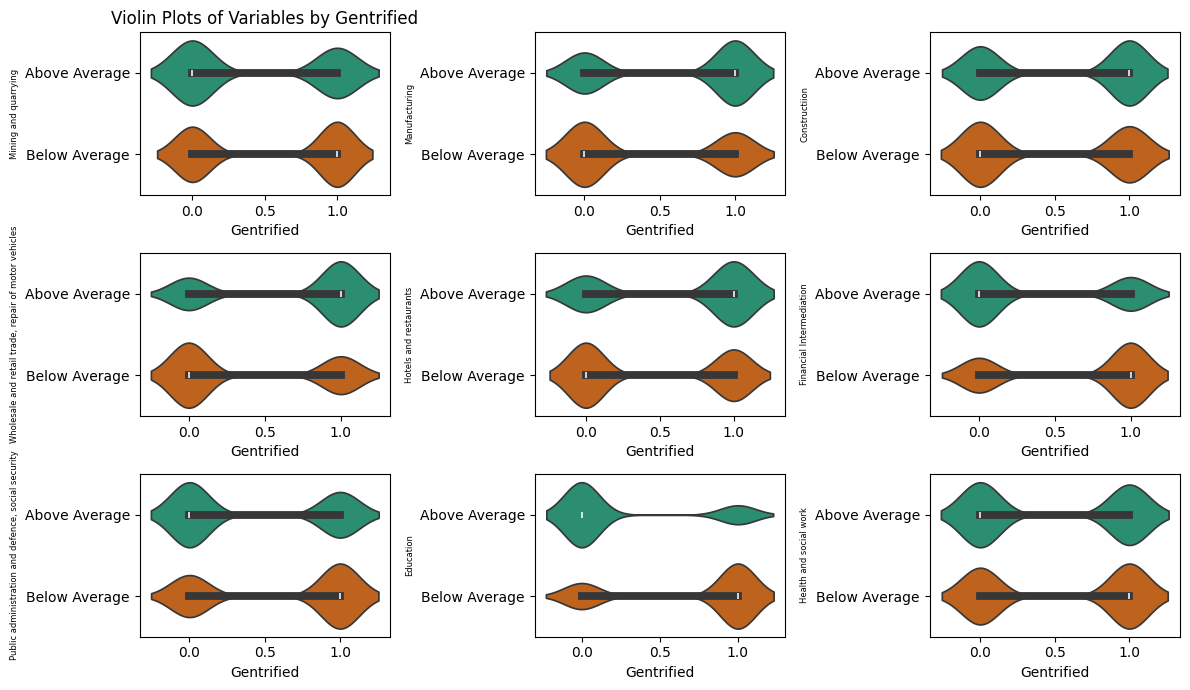

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
columns = ['C Mining and quarrying_Avg', 'D Manufacturing_Avg', 'F Constructiion_Avg',
           'G Wholesale and retail trade, repair of motor vehicles_Avg',
           'H Hotels and restaurants_Avg', 'J Financial Intermediation_Avg',
           'L Public administration and defence, social security_Avg',
           'M Education_Avg', 'N Health and social work_Avg']

# Create the violin plots
fig, axes = plt.subplots(3, 3, figsize=(12, 7))
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.violinplot(ax=axes[row, col], data=df_occu, x=
                   'Gentrified', y=column, inner='box', palette='Dark2',order=['Above Average', 'Below Average'])
    axes[row, col].set_ylabel(column[2:-4], fontsize=6)

# Remove empty subplots
if len(columns) < 9:
    for i in range(len(columns), 9):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

# Set the x-axis label
axes[-1, 1].set_xlabel('Gentrified')

# Set the plot title
axes[0, 0].set_title('Violin Plots of Variables by Gentrified')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
df_Emp = pd.read_csv("Census2011_cleaned_Economics.csv")

df_Emp.dtypes
df_Emp_column = df_Emp.columns.tolist()
df_Emp= df_Emp[['LSOA',
 'Pincode',
 'Gentrified',
 'Economically active: In employment_Avg',
 'Economically active: Unemployed_Avg',
 'Economically active: Full-time student_Avg',
 'Economically Inactive_Avg']]

df_Emp

,LSOA,Pincode,Gentrified,Economically active: In employment_Avg,Economically active: Unemployed_Avg,Economically active: Full-time student_Avg,Economically Inactive_Avg
0,Bolton 005A,E01004766,1,Above Average,Above Average,Below Average,Below Average
1,Bolton 005B,E01004767,1,Above Average,Below Average,Above Average,Below Average
2,Bolton 001A,E01004768,0,Above Average,Below Average,Below Average,Below Average
3,Bolton 003A,E01004769,0,Above Average,Below Average,Below Average,Below Average
4,Bolton 003B,E01004770,0,Above Average,Below Average,Below Average,Above Average
...,...,...,...,...,...,...,...
1668,Manchester 013F,E01033684,0,Above Average,Below Average,Above Average,Below Average
1669,Manchester 003F,E01033685,0,Above Average,Below Average,Above Average,Below Average
1670,Manchester 028F,E01033686,0,Above Average,Below Average,Above Average,Below Average
1671,Manchester 003G,E01033687,0,Below Average,Above Average,Below Average,Above Average


<ipython-input-13-482d6cd44a3e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[row, col], data=df_Emp, x=
<ipython-input-13-482d6cd44a3e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[row, col], data=df_Emp, x=
<ipython-input-13-482d6cd44a3e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[row, col], data=df_Emp, x=
<ipython-input-13-482d6cd44a3e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `lege

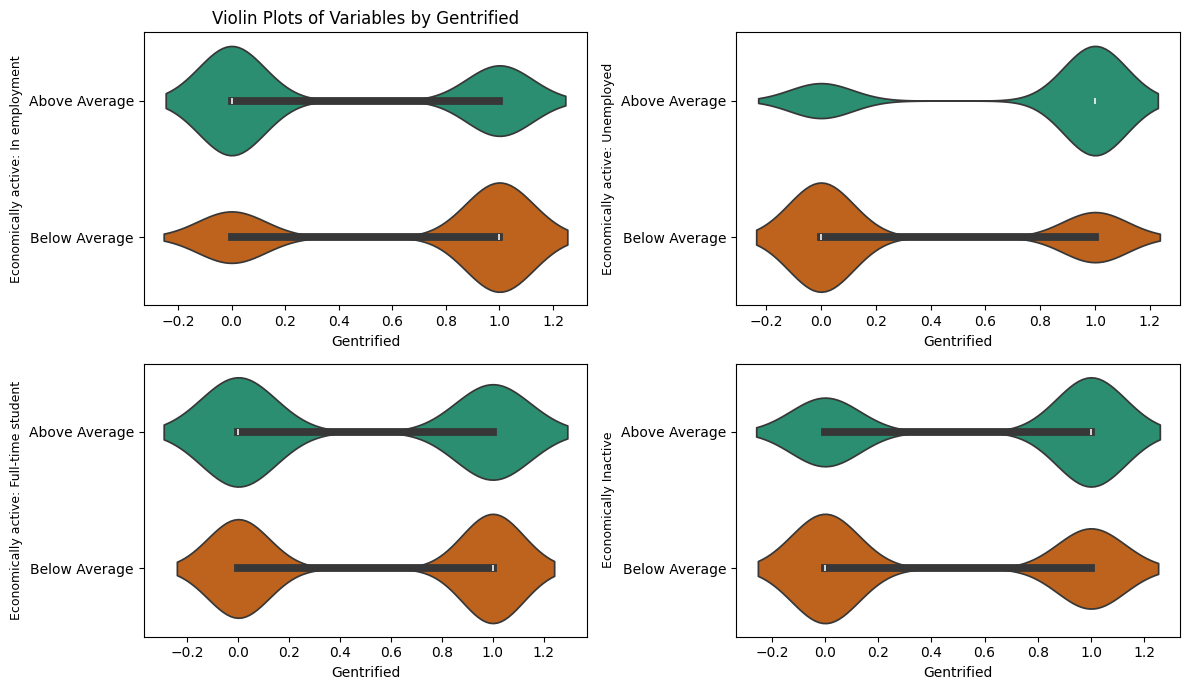

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
columns = ['Economically active: In employment_Avg',
            'Economically active: Unemployed_Avg',
            'Economically active: Full-time student_Avg',
            'Economically Inactive_Avg']

# Create the violin plots
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.violinplot(ax=axes[row, col], data=df_Emp, x=
                   'Gentrified', y=column, inner='box', palette='Dark2',order=['Above Average', 'Below Average'])
    axes[row, col].set_ylabel(column[:-4], fontsize=9)

# Remove empty subplots
if len(columns) < 4:
    for i in range(len(columns), 4):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

# Set the x-axis label
axes[-1, 1].set_xlabel('Gentrified')

# Set the plot title
axes[0, 0].set_title('Violin Plots of Variables by Gentrified')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [36]:
df_Qua = pd.read_csv("Census2011_cleansed_Qualification.csv")

df_Qua_column = df_Qua.columns.tolist()

df_Qua = df_Qua[['LSOA',
                'Pincode',
                'Gentrified',
                'No qualifications_Avg',
                'Highest level of qualification: Level 1 qualifications_Avg',
                'Highest level of qualification: Level 2 qualifications_Avg',
                'Highest level of qualification: Level 3 qualifications_Avg',
                'Highest level of qualification: Level 4 qualifications and above_Avg',
                'Highest level of qualification: Other qualifications_Avg']]

df_Qua = df_Qua.rename(columns={
    'No qualifications_Avg': 'No qualifications',
    'Highest level of qualification: Level 1 qualifications_Avg': 'Level 1 qualifications',
    'Highest level of qualification: Level 2 qualifications_Avg': 'Level 2 qualifications',
    'Highest level of qualification: Level 3 qualifications_Avg': 'Level 3 qualifications',
    'Highest level of qualification: Level 4 qualifications and above_Avg': 'Level 4 qualifications and above',
    'Highest level of qualification: Other qualifications_Avg': 'Other qualifications'
})

df_Qua

,LSOA,Pincode,Gentrified,No qualifications,Level 1 qualifications,Level 2 qualifications,Level 3 qualifications,Level 4 qualifications and above,Other qualifications
0,Bolton 005A,E01004766,1,Above Average,Above Average,Below Average,Above Average,Below Average,Below Average
1,Bolton 005B,E01004767,1,Below Average,Above Average,Above Average,Above Average,Below Average,Below Average
2,Bolton 001A,E01004768,0,Below Average,Below Average,Above Average,Above Average,Above Average,Below Average
3,Bolton 003A,E01004769,0,Below Average,Below Average,Above Average,Above Average,Above Average,Below Average
4,Bolton 003B,E01004770,0,Below Average,Above Average,Below Average,Above Average,Above Average,Below Average
...,...,...,...,...,...,...,...,...,...
1668,Manchester 013F,E01033684,0,Below Average,Below Average,Below Average,Below Average,Above Average,Below Average
1669,Manchester 003F,E01033685,0,Below Average,Below Average,Above Average,Below Average,Above Average,Below Average
1670,Manchester 028F,E01033686,0,Below Average,Below Average,Below Average,Below Average,Above Average,Above Average
1671,Manchester 003G,E01033687,0,Above Average,Below Average,Below Average,Above Average,Below Average,Above Average


<ipython-input-41-dc748e515a66>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[row, col], data=df_Qua, x=
<ipython-input-41-dc748e515a66>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[row, col], data=df_Qua, x=
<ipython-input-41-dc748e515a66>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[row, col], data=df_Qua, x=
<ipython-input-41-dc748e515a66>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `lege

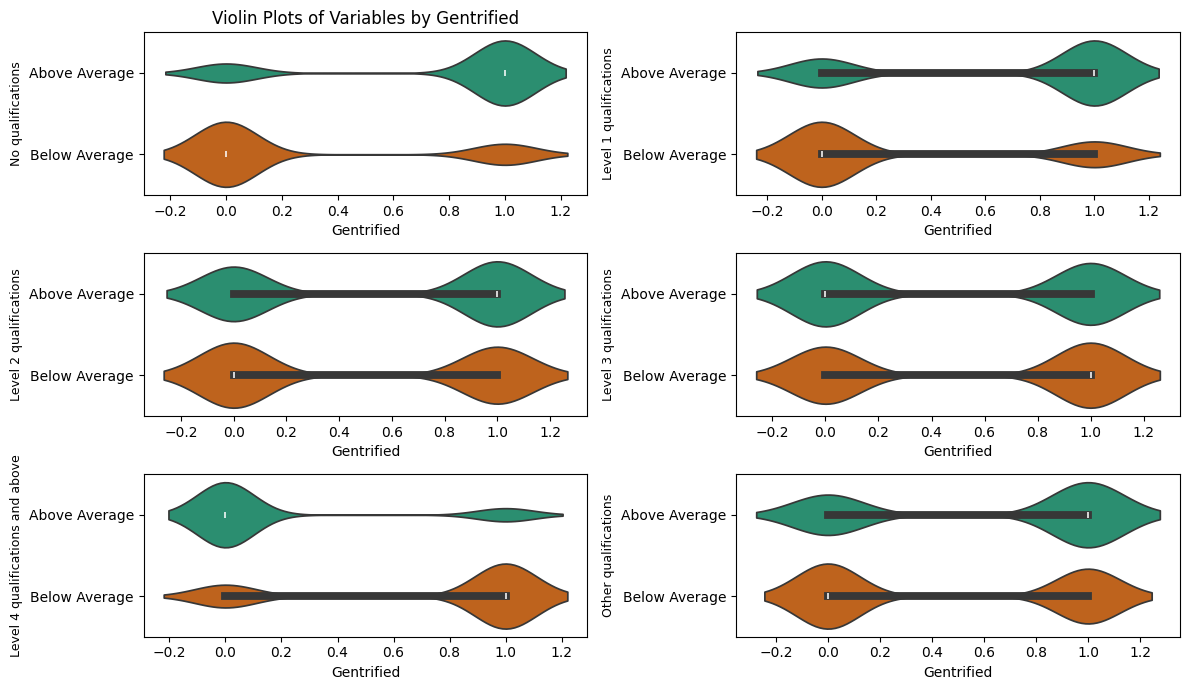

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
columns = ['No qualifications',
                 'Level 1 qualifications',
                 'Level 2 qualifications',
                 'Level 3 qualifications',
                 'Level 4 qualifications and above',
                 'Other qualifications']

# Create the violin plots
fig, axes = plt.subplots(3, 2, figsize=(12, 7))
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.violinplot(ax=axes[row, col], data=df_Qua, x=
                   'Gentrified', y=column, inner='box', palette='Dark2',order=['Above Average', 'Below Average'])
    axes[row, col].set_ylabel(column, fontsize=9)

# Remove empty subplots
if len(columns) < 6:
    for i in range(len(columns), 6):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

# Set the x-axis label
axes[-1, 1].set_xlabel('Gentrified')

# Set the plot title
axes[0, 0].set_title('Violin Plots of Variables by Gentrified')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-43-34e89e59b2a7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[i], data=df_Qua, x='Gentrified', y=column, inner='box', palette='Dark2', order=['Above Average', 'Below Average'])
<ipython-input-43-34e89e59b2a7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[i], data=df_Qua, x='Gentrified', y=column, inner='box', palette='Dark2', order=['Above Average', 'Below Average'])


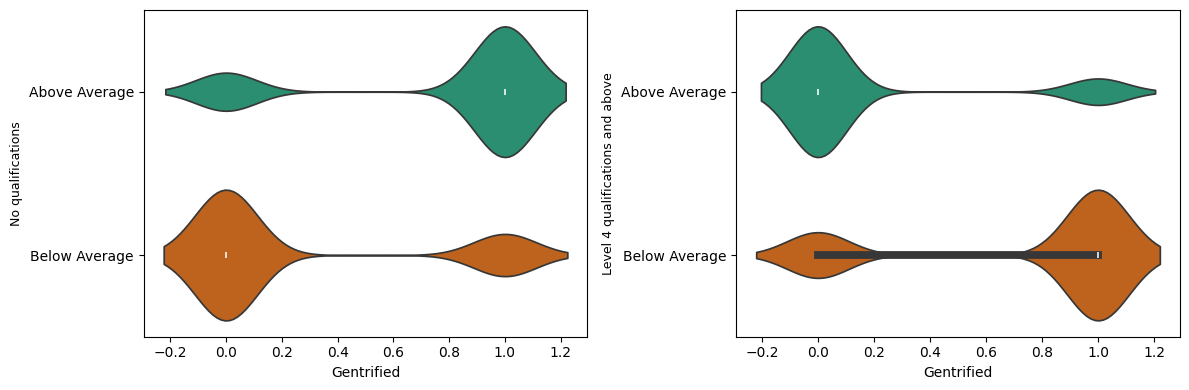

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

# Select the desired columns
columns = ['No qualifications', 'Level 4 qualifications and above']

# Create the violin plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for i, column in enumerate(columns):
    sns.violinplot(ax=axes[i], data=df_Qua, x='Gentrified', y=column, inner='box', palette='Dark2', order=['Above Average', 'Below Average'])
    axes[i].set_ylabel(column, fontsize=9)

# Set the x-axis label
axes[0].set_xlabel('Gentrified')
axes[1].set_xlabel('Gentrified')

# # Set the plot titles
# axes[0].set_title('Violin Plot of No Qualifications by Gentrified')
# axes[1].set_title('Violin Plot of Level 4 Qualifications and Above by Gentrified')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()